Created: 7/1/2025

Purpose: Exploratory Data analysis on the generated model dataset

In [5]:
# import libraries and functions

from heatmap_analysis import Report, gather_model_paths, load_references, open_log, step_file_system
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import copy

This is the setup to load dataset into memory for further analysis

In [2]:
class_path = "D:\\model_dataset\\classification"
regress_path = "D:\\model_dataset\\regression"
model_paths = gather_model_paths(class_path, regress_path)
class_models = load_references(model_paths[1])
regress_models = load_references(model_paths[0])
class_logs_agg = []
regress_logs_agg = []
class_by_dataset = {}
regress_by_dataset = {}

# Gather the data for the classification models
for model in class_models:
    log = open_log(model.model_path)
    class_logs_agg.append(log)
    rows = model.model_path.split('\\')[-2]
    if rows in class_by_dataset:
        class_by_dataset[rows].append(log)
    else:
        class_by_dataset.update({rows: [log]})

#Gather the data for the regression models
for model in regress_models:
    log = open_log(model.model_path)
    regress_logs_agg.append(log)
    rows = model.model_path.split('\\')[-2]
    if rows in regress_by_dataset:
        regress_by_dataset[rows].append(log)
    else:
        regress_by_dataset.update({rows: [log]})

In [3]:
class_data = pd.DataFrame(class_by_dataset)
class_agg = pd.Series(class_logs_agg)
regress_agg = pd.Series(regress_logs_agg)
regress_data = pd.DataFrame(regress_by_dataset)

In [6]:
temp_c_data = copy.deepcopy(class_by_dataset)
temp_r_data = copy.deepcopy(regress_by_dataset)
class_format_data = {}
regress_format_data = {}
for key in temp_c_data:
    optimizers_regress_dict = {}
    optimizers_class_dict = {}
    class_logs = temp_c_data[key]
    regress_logs = temp_r_data[key]
    for index, item in enumerate(regress_logs):
        class_opt = class_logs[index]
        if item.optimizer in list(optimizers_regress_dict.keys()):
            optimizers_regress_dict[item.optimizer].append(item.accuracy)
        else:
            optimizers_regress_dict.update({item.optimizer: [item.accuracy]})
        if class_opt.optimizer in list(optimizers_class_dict.keys()):
            optimizers_class_dict[class_opt.optimizer].append(class_opt.accuracy)
        else:
            optimizers_class_dict.update({class_opt.optimizer: [class_opt.accuracy]})
    regress_format_data.update({key: optimizers_regress_dict})
    class_format_data.update({key: optimizers_class_dict})
print(regress_format_data)
print(class_format_data)

{'10000_rows': {"<class 'torch.optim.sgd.SGD'>": [15.774056267738342, 13.303701376914978, 15.875729250907899, 13.716275405883788, 15.30386791229248, 14.942710411548614, 13.861950409412383, 15.043161964416504, 14.048797821998596, 15.03866765499115, 15.510310781002044, 8.272353553771973, 13.547513151168824, 14.430558013916016, 15.856313896179199, 0.018425628612749278, 15.148185968399048, 17.420637011528015, 14.220658004283905, 15.263919353485107, 19.537722015380858], "<class 'torch.optim.asgd.ASGD'>": [15.342079997062683, 15.647779774665832, 15.199968600273133, 6.0092240333557125, 15.706972122192383, 17.4109610080719, 14.833190751075744, 15.71583092212677, 15.98390281200409, 14.94753942489624, 10.573571181297302, 15.11195511817932, 14.793414783477782, 15.779640245437623, 12.806164360046386, 11.161407780647277, 14.862420463562012, 15.772013783454895, 8.519432723522186, 4.236515682935715, 14.925632750988006, 15.795828008651734, 15.663960599899292], "<class 'torch.optim.rmsprop.RMSprop'>": 

In [4]:
temp_agg = class_agg.copy().to_numpy()
temp_r_agg = regress_agg.copy().to_numpy()
optimizers_dict = {}
for index, item in enumerate(temp_r_agg):
    class_opt = temp_agg[index].optimizer
    if item.optimizer in list(optimizers_dict.keys()):
        optimizers_dict[item.optimizer] += 1
    else:
        optimizers_dict.update({item.optimizer: 1})
    if class_opt in list(optimizers_dict.keys()):
        optimizers_dict[class_opt] += 1
    else:
        optimizers_dict.update({class_opt: 1})
print(optimizers_dict)

{"<class 'torch.optim.sgd.SGD'>": 404, "<class 'torch.optim.adam.Adam'>": 390, "<class 'torch.optim.asgd.ASGD'>": 386, "<class 'torch.optim.rmsprop.RMSprop'>": 420}


Note: Seems the dataset is biased towards the RMSProp optimizer, but not by a huge margin.

In [25]:
temp_agg = class_agg.copy().to_numpy()
temp_r_agg = regress_agg.copy().to_numpy()
optimizers_regress_dict = {}
optimizers_class_dict = {}
for index, item in enumerate(temp_r_agg):
    class_opt = temp_agg[index]
    if item.optimizer in list(optimizers_regress_dict.keys()):
        optimizers_regress_dict[item.optimizer].append(item.accuracy)
    else:
        optimizers_regress_dict.update({item.optimizer: [item.accuracy]})
    if class_opt.optimizer in list(optimizers_class_dict.keys()):
        optimizers_class_dict[class_opt.optimizer].append(class_opt.accuracy)
    else:
        optimizers_class_dict.update({class_opt.optimizer: [class_opt.accuracy]})
print(optimizers_class_dict)
print(optimizers_regress_dict)
for class_key in optimizers_class_dict:
    print(f"Descriptive Stats on BCELoss for {class_key}:\n\t {pd.Series(optimizers_class_dict[class_key]).describe()}")
for regress_key in optimizers_regress_dict:
    print(f"Descriptive Stats on MSELoss for {regress_key}:\n\t {pd.Series(optimizers_regress_dict[regress_key]).describe()}")

{"<class 'torch.optim.adam.Adam'>": [0.19095044247806073, 0.19210295733064414, 0.19103337600827217, 0.17764861267060042, 0.1994794026017189, 0.19602566491812468, 0.1999215031042695, 0.19574149372056127, 0.18166141044348477, 0.19260097527876496, 0.1984944211319089, 0.19175176192075014, 0.1816417548805475, 0.15646829847246407, 0.19614697936922312, 0.18736496847122908, 0.19158799406141042, 0.18166359476745128, 0.1855618730187416, 0.1589671216905117, 0.19589311629533768, 0.1902235297486186, 0.18381822891533375, 0.50465819639309, 0.19190782432754835, 0.19604256469756365, 0.19003963780899844, 0.18198642553761601, 0.19726972297454873, 0.18579809887645146, 0.1939192971525093, 0.6640939330488133, 0.19943936805551252, 0.19900039614488682, 0.19902015027279654, 0.4311271090021667, 0.1974139683879912, 0.19894713846345743, 0.5316610627730066, 0.198163993190974, 0.19331787837048373, 0.19457737592359384, 0.19196183818082016, 0.17719423901289702, 0.19686094795664152, 0.18536949940025807, 0.175500580544

In [16]:
temp_agg = class_agg.copy().to_numpy()
temp_r_agg = regress_agg.copy().to_numpy()
optimizers_regress_dict = {}
optimizers_class_dict = {}
for index, item in enumerate(temp_r_agg):
    class_opt = temp_agg[index]
    if item.optimizer in list(optimizers_regress_dict.keys()):
        optimizers_regress_dict[item.optimizer].append(item.epochs)
    else:
        optimizers_regress_dict.update({item.optimizer: [item.epochs]})
    if class_opt.optimizer in list(optimizers_class_dict.keys()):
        optimizers_class_dict[class_opt.optimizer].append(class_opt.epochs)
    else:
        optimizers_class_dict.update({class_opt.optimizer: [class_opt.epochs]})
print(optimizers_class_dict)
print(optimizers_regress_dict)
for class_key in optimizers_class_dict:
    print(f"Descriptive Stats on Epochs for {class_key}:\n {pd.Series(optimizers_class_dict[class_key]).describe()}")
for regress_key in optimizers_regress_dict:
    print(f"Descriptive Stats on Epochs for {regress_key}:\n {pd.Series(optimizers_regress_dict[regress_key]).describe()}")

{"<class 'torch.optim.adam.Adam'>": [2, 9, 7, 3, 15, 1, 2, 2, 2, 7, 2, 3, 3, 2, 15, 8, 3, 2, 10, 2, 2, 3, 4, 30, 4, 9, 4, 5, 5, 5, 2, 30, 14, 9, 3, 30, 3, 19, 30, 3, 12, 5, 2, 2, 12, 2, 5, 2, 2, 1, 1, 2, 13, 4, 4, 12, 1, 2, 6, 2, 5, 3, 12, 11, 11, 4, 1, 3, 1, 1, 1, 3, 1, 2, 2, 1, 1, 3, 1, 2, 2, 7, 1, 1, 1, 3, 4, 3, 1, 3, 3, 2, 7, 11, 30, 5, 30, 30, 19, 19, 5, 14, 2, 30, 30, 30, 30, 30, 30, 30, 13, 30, 30, 9, 30, 30, 15, 30, 7, 16, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 19, 30, 30, 30, 13, 30, 30, 30, 4, 29, 13, 16, 13, 30, 17, 10, 30, 9, 14, 3, 4, 4, 10, 3, 4, 4, 5, 20, 2, 22, 4, 2, 3, 5, 10, 8, 4, 4, 8, 11, 30, 2, 19, 8], "<class 'torch.optim.asgd.ASGD'>": [30, 19, 21, 30, 15, 20, 30, 18, 30, 20, 20, 30, 30, 19, 18, 30, 14, 30, 30, 29, 30, 30, 30, 23, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 29, 30, 30, 27, 30, 30, 30, 30, 30, 30, 30, 21, 30, 19, 13, 12, 15, 30, 30, 16, 30, 11, 30, 19, 30, 24, 30, 13, 

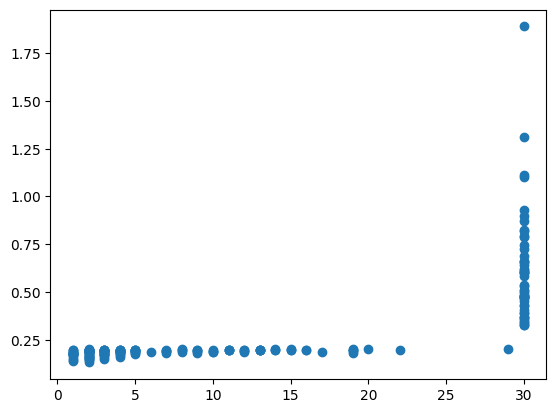

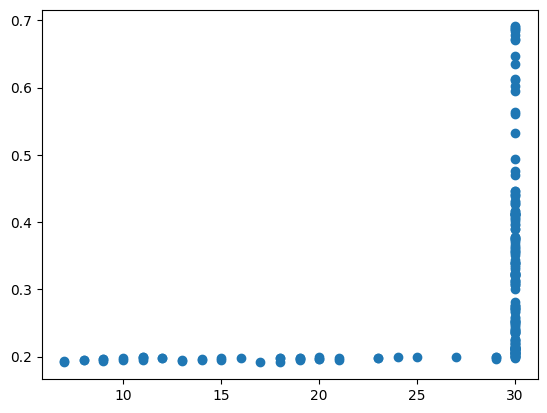

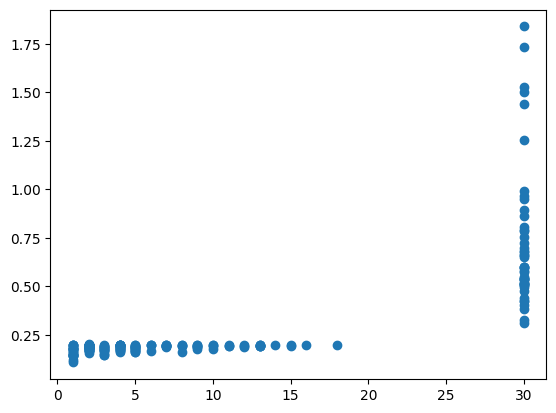

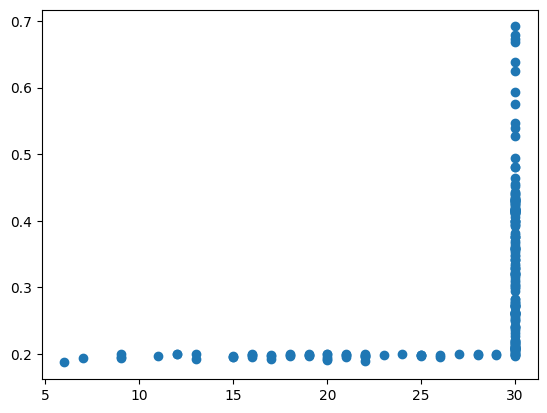

In [26]:
temp_agg = class_agg.copy().to_numpy()
temp_r_agg = regress_agg.copy().to_numpy()
optimizers_regress_dict = {}
optimizers_class_dict = {}
for index, item in enumerate(temp_r_agg):
    class_opt = temp_agg[index]
    if item.optimizer in list(optimizers_regress_dict.keys()):
        optimizers_regress_dict[item.optimizer].append((item.accuracy, item.epochs))
    else:
        optimizers_regress_dict.update({item.optimizer: [(item.accuracy, item.epochs)]})
    if class_opt.optimizer in list(optimizers_class_dict.keys()):
        optimizers_class_dict[class_opt.optimizer].append((class_opt.accuracy, class_opt.epochs))
    else:
        optimizers_class_dict.update({class_opt.optimizer: [(class_opt.accuracy, class_opt.epochs)]})
fig_num = 0
for value in list(optimizers_class_dict.values()):
    x_vals = []
    y_vals = []
    for x_y_tups in value:
        x_vals.append(x_y_tups[1])
        y_vals.append(x_y_tups[0])
    fig = plt.figure(fig_num)
    plt.scatter(x_vals, y_vals)
    plt.show()
    fig_num += 1 
